<a href="https://colab.research.google.com/github/Arta-DS/Lin_Alg_HW/blob/main/%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D0%B0%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

             message: Optimization terminated successfully.
             success: True
                 fun: 4.440892098500626e-16
                   x: [ 0.000e+00  0.000e+00]
                 nit: 96
                nfev: 2973
          population: [[ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]
                       ...
                       [ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]]
 population_energies: [ 4.441e-16  4.441e-16 ...  4.441e-16  4.441e-16]

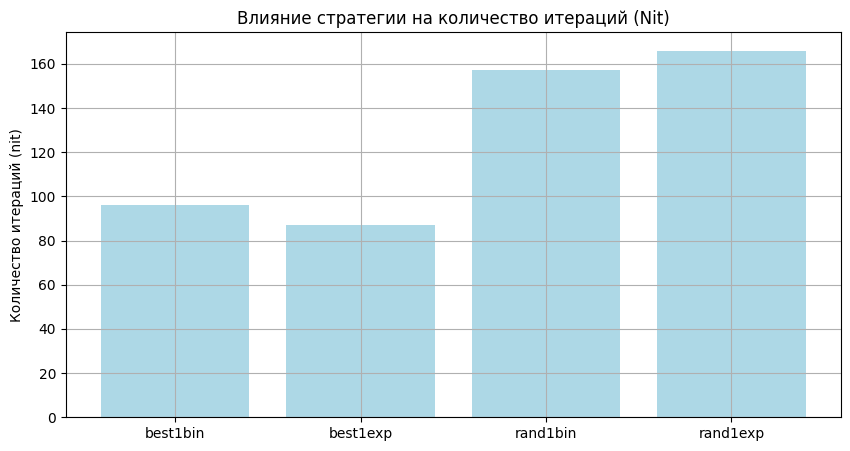

In [6]:
# Эксперимент с разными стратегиями
strategies = ['best1bin', 'best1exp', 'rand1bin', 'rand1exp']
nit_values_strategy = []

for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    nit_values_strategy.append(result.nit)

# График для стратегий
plt.figure(figsize=(10, 5))
plt.bar(strategies, nit_values_strategy, color='lightblue')
plt.ylabel('Количество итераций (nit)')
plt.title('Влияние стратегии на количество итераций (Nit)')
plt.grid()
plt.show()


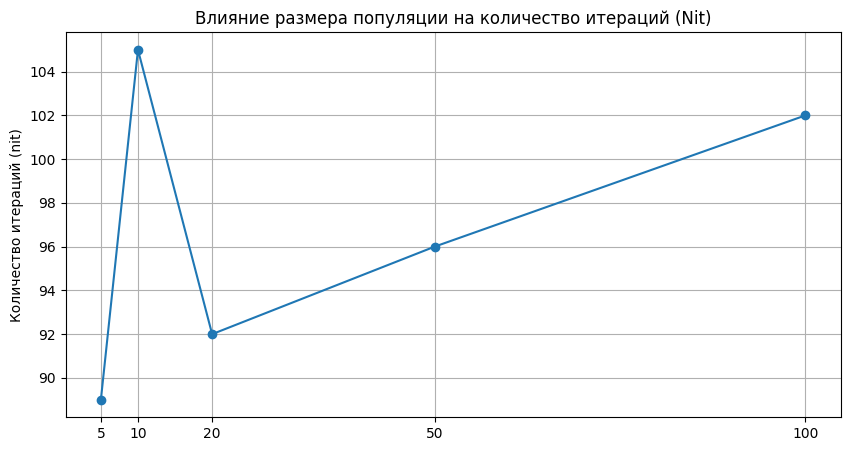

In [7]:
# Эксперимент с разными размерами популяции
popsize_values = [5, 10, 20, 50, 100]
nit_values_popsize = []

for popsize in popsize_values:
    result = differential_evolution(ackley, bounds, popsize=popsize, seed=42)
    nit_values_popsize.append(result.nit)

# График для popsize
plt.figure(figsize=(10, 5))
plt.plot(popsize_values, nit_values_popsize, marker='o')
plt.xticks(popsize_values)
plt.ylabel('Количество итераций (nit)')
plt.title('Влияние размера популяции на количество итераций (Nit)')
plt.grid()
plt.show()

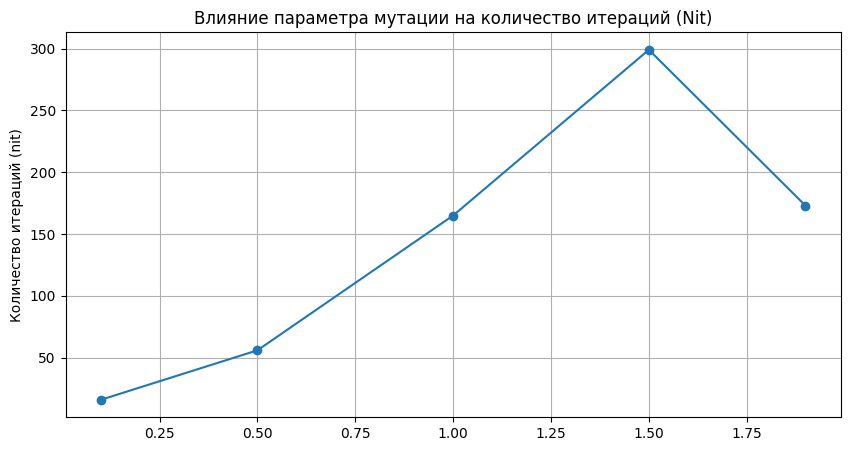

In [10]:
# Эксперимент с разными значениями мутации
mutation_values = [0.1, 0.5, 1.0, 1.5, 1.9]
nit_values_mutation = []

for mutation in mutation_values:
    result = differential_evolution(ackley, bounds, mutation=mutation, seed=42)
    nit_values_mutation.append(result.nit)

# График для mutation
plt.figure(figsize=(10, 5))
plt.plot(mutation_values, nit_values_mutation, marker='o')
plt.ylabel('Количество итераций (nit)')
plt.title('Влияние параметра мутации на количество итераций (Nit)')
plt.grid()
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [19]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 0.000e+00,  5.136e-05,  8.816e-05]))

In [21]:
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)

    first_term = -a * np.exp(-b * np.sqrt(1 / d * sum(x**2)))
    second_term = -np.exp(1 / d * sum(np.cos(c * x))) + a + np.exp(1)

    return first_term + second_term

x0 = [0, 0]

result_m = minimize(ackley, x0, method='Nelder-Mead', options={'maxiter': 100})

print("Final simplex:")
print(result_m.final_simplex)
print()
print("Function value at minimum: {}".format(result_m.fun))
print("Message: {}".format(result_m.message))
print("Number of function evaluations: {}".format(result_m.nfev))
print("Number of iterations: {}".format(result_m.nit))
print("Status: {}".format(result_m.status))
print("Success: {}".format(result_m.success))
print("Optimal parameters: {}".format(result_m.x))

Final simplex:
(array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([0.00000000e+00, 5.13604405e-05, 8.81584216e-05]))

Function value at minimum: 0.0
Message: Optimization terminated successfully.
Number of function evaluations: 17
Number of iterations: 8
Status: 0
Success: True
Optimal parameters: [0. 0.]


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
